In [2]:
import math
import numpy as np
import astra
import matplotlib.pyplot as plt
import mat73

# T H   2022

In [3]:
def createASTRAoperator_fanbeam(N, SOD, ODD, pixelSize, N_det, theta):
    """
    # Function for building the OpTomo forward operator

    N         : Reconstruction resolution (N x N image)
    SOD       : Source-to-Origin Distance
    ODD       : Origin-to-Detector Distance
    pixelSize : Width of the detector element after binning
    N_det     : Number of detector elements
    theta     : Projection angles (in degrees)
    """

    M = (SOD + ODD) / SOD # Geometric magnification
    effPixelSize = pixelSize / M # Effective pixelSize
    anglesRad = theta*(math.pi/180)
   
    projGeom = astra.create_proj_geom('fanflat', M, N_det, anglesRad, SOD/effPixelSize, ODD/effPixelSize)
    volGeom = astra.create_vol_geom(N,N)
    projId = astra.create_projector('strip_fanflat', projGeom, volGeom)
   
    return astra.OpTomo(projId)


In [4]:
def createASTRAmatrix_fanbeam(N, SOD, ODD, pixelSize, N_det, theta):
    """
    # Function for building the forward operator matrix

    N         : Reconstruction resolution (N x N image)
    SOD       : Source-to-Origin Distance
    ODD       : Origin-to-Detector Distance
    pixelSize : Width of the detector element after binning
    N_det     : Number of detector elements
    theta     : Projection angles (in degrees)
    """

    M = (SOD + ODD) / SOD # Geometric magnification
    effPixelSize = pixelSize / M # Effective pixelSize
    anglesRad = theta*(math.pi/180)
   
    projGeom = astra.create_proj_geom('fanflat', M, N_det, anglesRad, SOD/effPixelSize, ODD/effPixelSize)
    volGeom = astra.create_vol_geom(N,N)
    projId = astra.create_projector('strip_fanflat', projGeom, volGeom)
    matrixId = astra.projector.matrix(projId)
   
    return astra.matrix.get(matrixId)

In [5]:
# initialize everything
N = 560
N_det = 560
N_theta = 720 
theta = np.linspace(0,360,N_theta,endpoint=False)

# Load measurement data as sinogram
data = mat73.loadmat('/Users/mirjetapasha/Documents/Research_Projects/Helsinki/Pasha/2023-09-12_lego_singer/corrected/2023-09-12_lego_singer_ct_project_2d_binning_4.mat') # !!! Change the file path to suit yourself !!!
CtData = data["CtData"]
m = CtData["sinogram"]

# Load parameters
param = CtData["parameters"]
binningFactor = param["binningPost"]
SOD = param["distanceSourceOrigin"]
SDD = param["distanceSourceDetector"]
ODD = SDD - SOD # Origin-detector-distance
pixelSize = param["pixelSize"]*binningFactor


In [6]:
noise_level = 0.001
b_true = m
noise = np.random.randn(b_true.shape[0]).reshape(-1,1)
e = noise_level * np.linalg.norm(b_true) / np.linalg.norm(noise) * noise
b = b_true + e

In [10]:
x_true = np.ones((313600,1))
x_true.shape

(313600, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

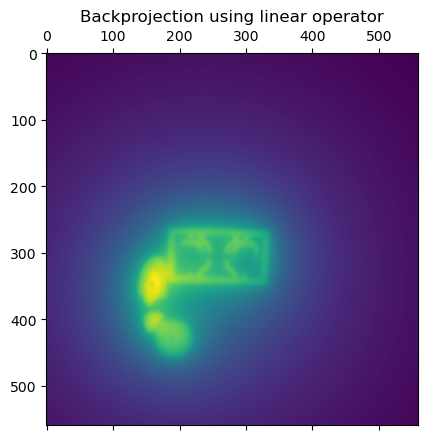

In [7]:
# Create ASTRA forward operator
Aop = createASTRAoperator_fanbeam(N, SOD, ODD, pixelSize, N_det, theta)
BPop = Aop.T*m # Backproject with operator (sinogram can be flattened or matrix)
plt.matshow(BPop.reshape((N,N)))
plt.title('Backprojection using linear operator')
plt.show

In [ ]:
forwa = lambda X: 

In [ ]:
proj_forward = lambda X: np.fliplr(astra.create_sino(X.reshape((self.nx,self.ny), order='F'), TT.define_proj_id(self.nx, self.ny, self.views))[1].flatten())
proj_backward = lambda B: astra.create_backprojection(np.fliplr(x_true.reshape((self.q, self.p))), self.proj_id)[1]
OperatorOut = pylops.FunctionOperator(proj_forward, proj_backward, self.nx*self.ny)

In [12]:
from trips.testProblems import *
from trips.solvers.GKS import *

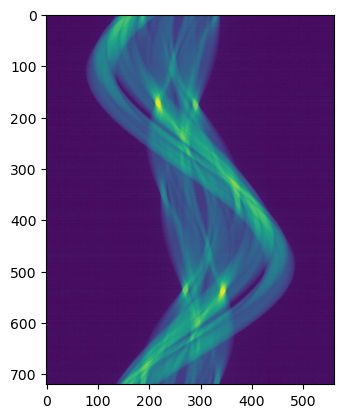

In [13]:
plt.imshow(b)

In [14]:
imagesize_x = 560
imagesize_y = 560
x_0 = Aop.T*m
I = pylops.Identity(imagesize_x*imagesize_y) # identity operator
D = first_derivative_operator(n=imagesize_x*imagesize_y) # first derivative operator

In [16]:
# first, run several iterations with crossvalidation.
solver = GKSClass(projection_dim=3, regparam='gcv', dp_stop=False, tol=10**(-16))
solver.run(Aop, b, D, iter=10, x_true = x_0)
# then use the estimated to initialize a sequence of values.
# regvals = [solver.lambda_history[-1]*(0.5**(x)) for x in range(0,80)]
# solver.change_regparam(regvals)
# solver.run(blur_operator, b, D, iter=80, x_true=x_true, warm_start=True)

generating basis...:   0%|          | 0/3 [00:00<?, ?it/s]

running GKS...:   0%|          | 0/50 [00:00<?, ?it/s]


ValueError: The dimensions of the data do not match those specified in the geometry: (313600, 1) != (560, 560)

In [11]:
# b = m
projection_dim = 5
b_vec = b.reshape((-1,1))
(U, B, V) = golub_kahan(Aop, b_vec, projection_dim)
VV = V
UU = U[:, 0:-1]
HH = B[0:-1, :]
bhat = UU.T.dot(b_vec)
y_tikh = np.linalg.solve(HH.T*HH, bhat)
x_GKahan = VV.dot(y_tikh)
# np.linalg.norm(x_GKahan.reshape((-1,1))-x_true.reshape((-1,1)))/np.linalg.norm(x_true.reshape((-1,1)))

NameError: name 'golub_kahan' is not defined

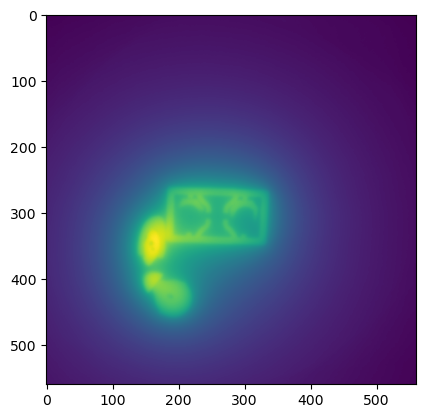

In [11]:
plt.imshow(x_GKahan.reshape((560, 560)))

In [17]:

b_vec.shape
D.shape
# x_0.shape

(313600, 313600)

In [36]:
imagesize_x = 560
imagesize_y = 560
x_0 = Aop.T*m
I = pylops.Identity(imagesize_x*imagesize_y) # identity operator
D = first_derivative_operator(n=imagesize_x*imagesize_y) # first derivative operator
D2 = D @ D # second derivative operator
# max_iters = 10
# solver = GKSClass(projection_dim=3, regparam='gcv', dp_stop=False, tol=10**(-16))
# solver.run(Aop, b_vec, D, iter = max_iters, x_true=x_0)

In [18]:
regvals = [0.001*(0.5**(x)) for x in range(0,80)]

In [ ]:
from trips.solvers.GKS import TP_gks
(x, x_history, lambdah, lambda_history, res_history, rre_history) = TP_gks(Aop, b_vec, D, regparam=regvals, projection_dim=3, n_iter=80, x_true=x_0, tol=10**(-16))

In [26]:
from trips.solvers.GKS import TP_gks
(x, x_history, lambdah, lambda_history, res_history, rre_history) = TP_gks(Aop, b_vec, D, regparam=regvals, projection_dim=3, n_iter=80, x_true=x_0, tol=10**(-16))

running GKS...:   0%|          | 0/80 [00:00<?, ?it/s]


ValueError: The dimensions of the data do not match those specified in the geometry: (313600, 1) != (560, 560)

In [ ]:
plt.imshow(x)

In [37]:
##Run CGLS here
# !!! Kernel crashes (posibly because of run out of memory issues)
from trips.solvers.CGLS import *
x_0 = Aop.T*m
# x_0 = Aop.T*b_vec
(x, x_history, k) = TP_cgls(Aop, b_vec, x_0, max_iter = 5, tol = 0.01)

: 

: 